<a href="https://colab.research.google.com/github/luciana11levy/coder/blob/main/Data_science_Australia_RainIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Predicción lluvias en Australia
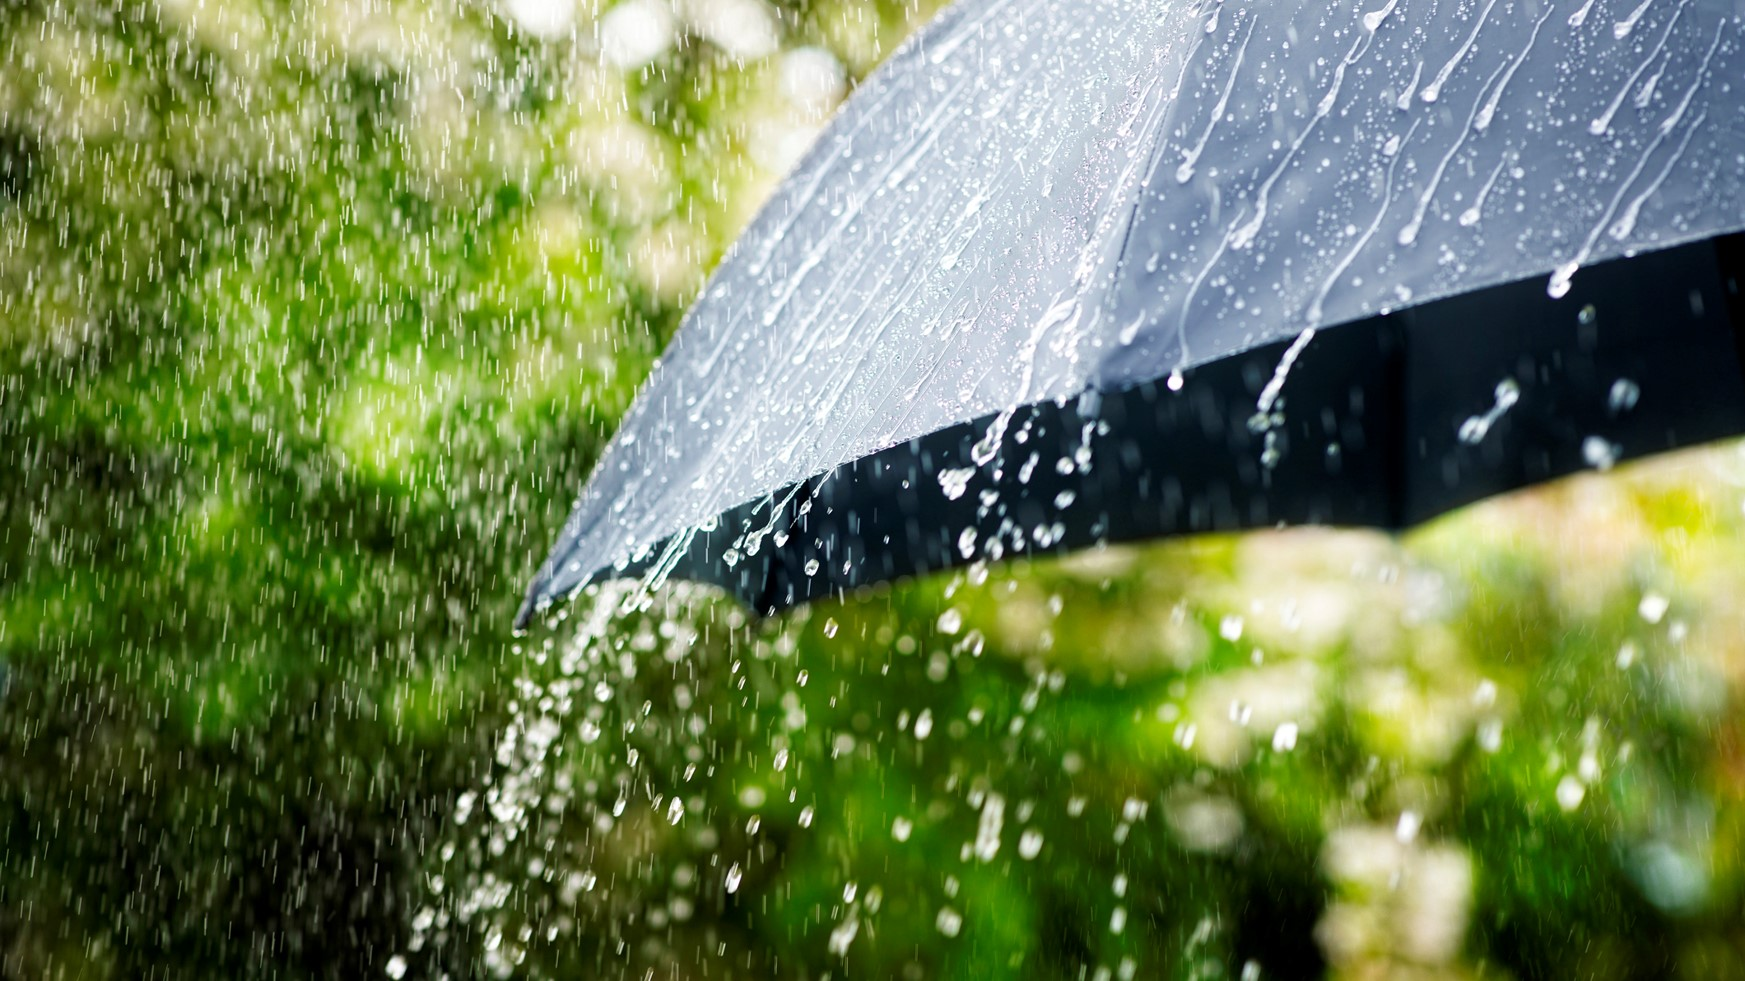


Los datos utilizados en este proyecto se descargaron del conjunto de datos de Kaggle titulado Rain in Australia, que a su vez se obtuvo originalmente de las Observaciones meteorológicas diarias de la Oficina Australiana de Meteorología.





Introducción/ Resumen

La predicción de lluvias es un componente crítico en la gestión de recursos hídricos, la planificación agrícola y la prevención de desastres naturales. Australia es un país caracterizado por eventos climáticos extremos, desde sequías prolongadas hasta intensas lluvias torrenciales, por lo que la capacidad de anticipar precipitaciones sería esencial para reducir impactos económicos, sociales y ambientales.

Muchas son las variables que influyen a la hora de predecir posibles precipitaciones como por ejemplo humedad, temperatura, presión atmosférica, entre otros.


Objetivo: El objetivo principal de este trabajo es analizar el conjunto de datos del dataset elegido para identificar patrones y relaciones de los factores climáticos y ambientales que podrían influir en la probabilidad de lluvia en diferentes regiones de Australia. A través de un análisis exploratorio, la creación de modelos predictivos y la visualización de datos, se pretende predecir la ocurrencia de lluvia en función de diversas características, como la temperatura, la humedad, la presión atmosférica y otros factores climáticos.

Contexto comercial: El sector agrícola y la gestión de recursos hídricos en Australia dependen enormemente de predicciones climáticas precisas, debido a los desafíos que plantea su clima variable y propenso a sequías. La capacidad de predecir con precisión si lloverá o no puede ser de gran ayuda para agricultores en cuanto a la planificación de siembra, riego y cosecha, como así también para la gestión de recursos hídricos y la optimización de embalses y sistemas de irrigación o seguros agrícolas respecto a realizar evaluaciones del riesgo meteorológico para pólizas.

Hipotesis:

*   Hipotesis 1:La temperatura media y la humedad relativa tienen una correlación positiva con la probabilidad de lluvia, es decir, a medida que la temperatura y la humedad aumentan, también aumenta la probabilidad de lluvia.
*   Hipotesis 2: Factores geográficos (ubicación, temporada del año) contribuyen significativamente a la probabilidad de lluvia.
*   Hipotesis de clasificación: Un modelo de aprendizaje supervisado puede predecir con precisión si lloverá al día siguiente en Australia, utilizando los datos meteorológicos proporcionados.





In [1]:
# Importar librerías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import plotly.express as px
import warnings
from sklearn.ensemble import IsolationForest
warnings.filterwarnings("ignore")

In [2]:
# Lectura de csv descargado
df = pd.read_csv('/content/sample_data/weatherAUS.csv.zip')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [3]:
df.shape

(142193, 24)

Hay 23 columnas y 145460 filas en el dataset

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

Definición de cada columna:


*   Date: Fecha de observación de los datos
*   Location: Locación de la estación metereologica donde se recopilaron los datos.
*   MinTemp:Temperatura mínima en las 24 horas hasta las 9 am.
*   MaxTemp:Temperatura máxima en las 24 horas hasta las 9 am.
*   Rainfall: Cantidad de precipitación en mm en las 24 horas.
*   Evaporation: Cantidad estimada de evaporación en mm de un tanque de agua abierto en 24 horas.
*   Sunshine: Cantidad promedio de horas de sol al día.
*   WindGustDir: Dirección del viento con mayor ráfaga durante las últimas 24 horas.
*   WindGustSpeed: Velocidad del viento con mayor ráfaga en km/h durante las últimas 24 horas.
*   WindDir9am: Dirección predominante del viento a las 9:00 AM.
*   WindDir3pm: Dirección predominante del viento a las 3:00 PM.
*   WindSpeed9am: Velocidad promedio del viento en km/h a las 9:00 AM.
*   WindSpeed3pm: Velocidad promedio del viento en km/h a las 3:00 PM.
*   Humidity9am: Humedad relativa (%) a las 9:00 AM.
*   Humidity3pm: Humedad relativa (%) a las 3:00 PM.
*   Pressure9am: Presión atmosférica (hPa) a las 9:00 AM.
*   Pressure3pm: Presión atmosférica (hPa) a las 3:00 PM.
*   Cloud9am:Fracción de cielo cubierto por nubes (de 0 a 9) a las 9:00 AM.
*   Cloud3pm:Fracción de cielo cubierto por nubes (de 0 a 9) a las 3:00 PM.
*   Temp9am: Temperatura en °C a las 9:00 AM.
*   Temp3pm: Temperatura en °C a las 3:00 PM.
*   RainToday:Variable binaria (Yes/No) que indica si llovió al menos 1 mm en las últimas 24 horas.
*   RainTomorrow: Variable objetivo (Yes/No) que indica si lloverá al menos 1 mm al día siguiente.








In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Hay variables categoricas de tipo object y variables numéricas de tipo Float. Se observan que hay datos faltantes para algunas variables.


In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


Un análisis estadísitico descriptivo de las variables numéricas respecto a la media, desvío estándar, mínimo, máximo, etc.

In [7]:
df.describe(include = "object")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2013-12-01,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


Análisis descriptivo de aquellas variables que son objetos como la dirección del viento, si llovió ese día, si va a llover y el tiempo y ubicación de la toma de datos.

In [8]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


Para observar mejor los datos faltantes se saca porcentaje de los mismos.

In [9]:
(df.isnull().sum() / len(df)) * 100

,0
Date,0.000000
Location,0.000000
MinTemp,0.447983
MaxTemp,0.226453
Rainfall,0.988797
Evaporation,42.789026
Sunshine,47.692924
WindGustDir,6.561504
WindGustSpeed,6.519308
WindDir9am,7.041838


El porcentaje de datos faltantes para las distintas variables. Las variables Sunshine, Evaporation, Cloud 9am y Cloud 3pm son las que mayor datos faltantes tienen (>35%). Las variables de locación y fecha no tienen datos faltantes.

In [10]:
duplicados = df.duplicated()

print(f"Número de duplicados: {duplicados.sum()}")

Número de duplicados: 0


Text(0.5, 1.0, 'Histogramas')

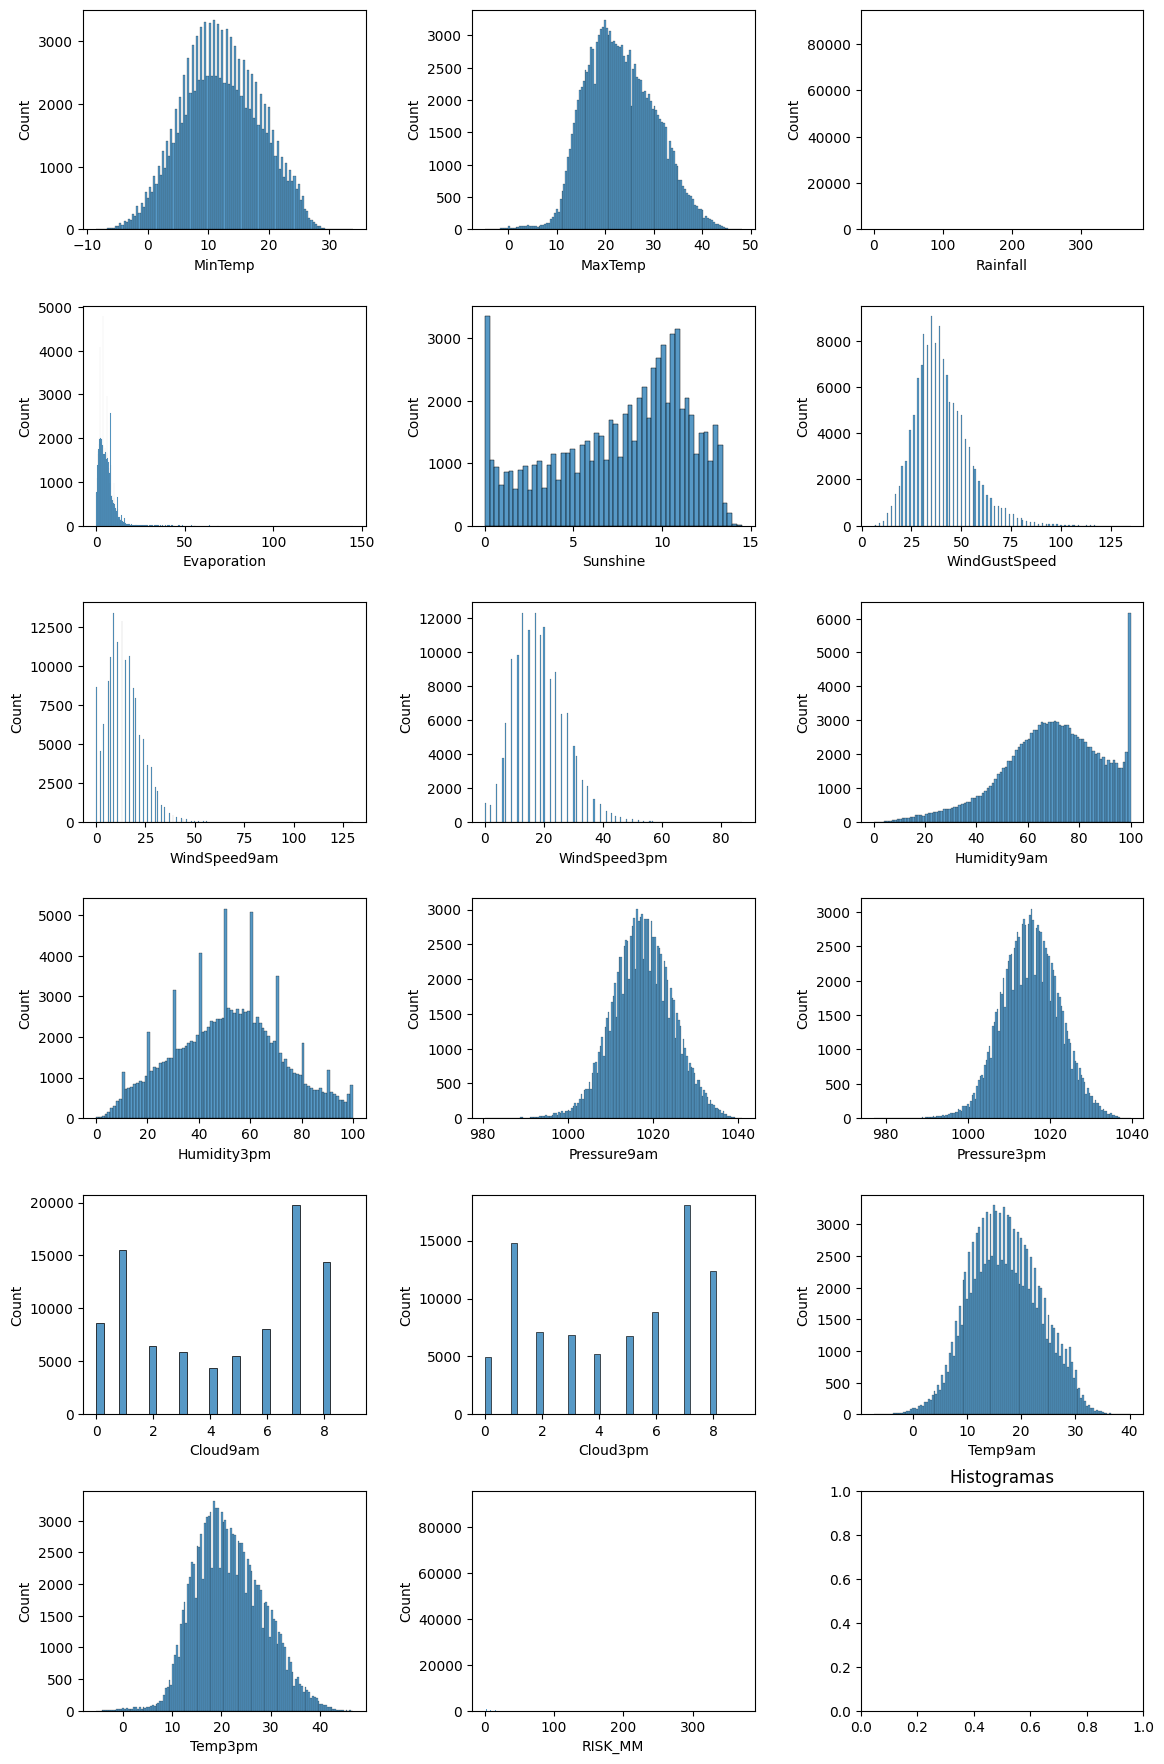

In [11]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.reshape(-1)

continuous = [col for col in df.columns if df[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(df[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histogramas')



Con los histogramas podemos ver la distribución de las variables numéricas. La mayoría de las variables analizadas sigue una distribución normal. Respecto a la distribución de las precipitaciones hará falta más investigación ya que según el análisis descriptivo estadístico realizado se puede inferir la existencia de muchos datos outliers.

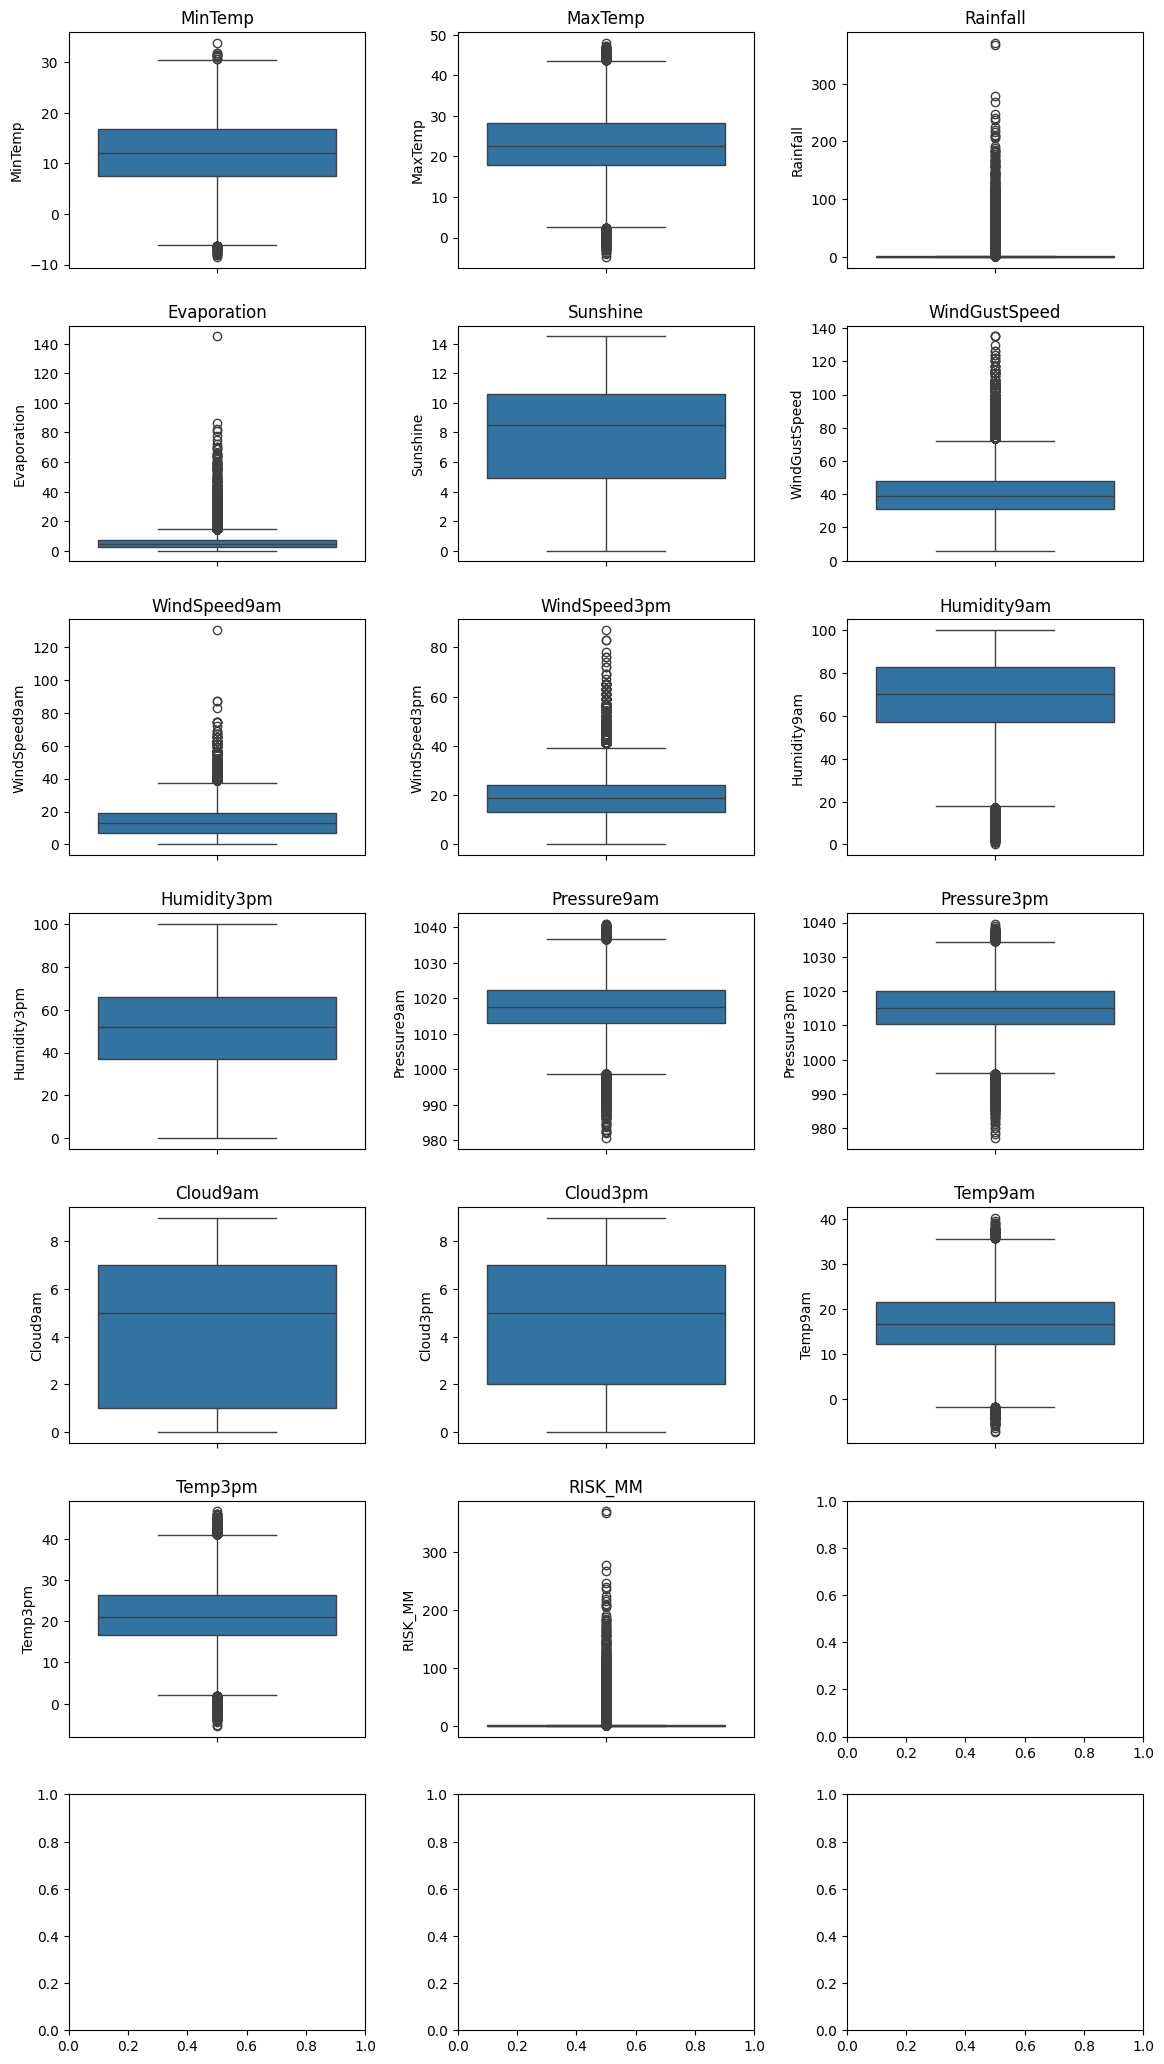

In [12]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12, 21))
axes = axes.reshape(-1)

continuous = [col for col in df.columns if df[col].dtype != object]
for i, col in enumerate(continuous):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

fig.tight_layout(pad=2.0)
plt.show()

Visualización de los outliers para las variables numéricas, no se decide sacarlas ya que cuando se pruebe el modelo de predicción se tendrá en cuenta la influencia de los mismos, si no serán removidos del análsis de datos.
Como era de esperarse por los análisis anteriormente hechos se puede observar que las precipitaciones tienen gran cantidad de datos outliers.

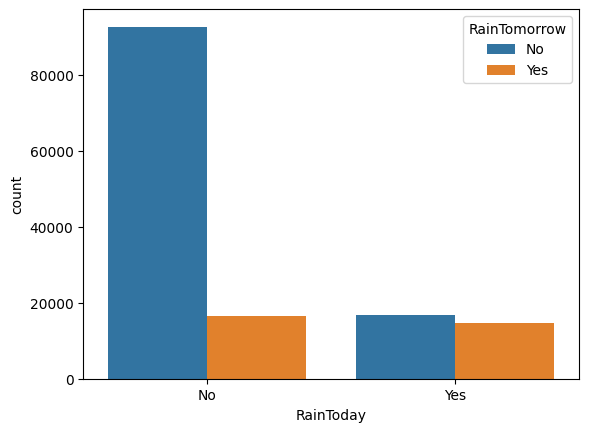

In [13]:
sns.countplot(x = 'RainToday', hue = 'RainTomorrow', data = df);

A partir del gráfico se puede observar la relación que existe entre si llovió hoy y si va a llover mañana, ya que la mayoría de los datos infiere que si llovió hoy, lloverá mañana también. En cambio, si no llovió hoy existen casi las mismas posibilidades de que llueva o no llueva mañana.

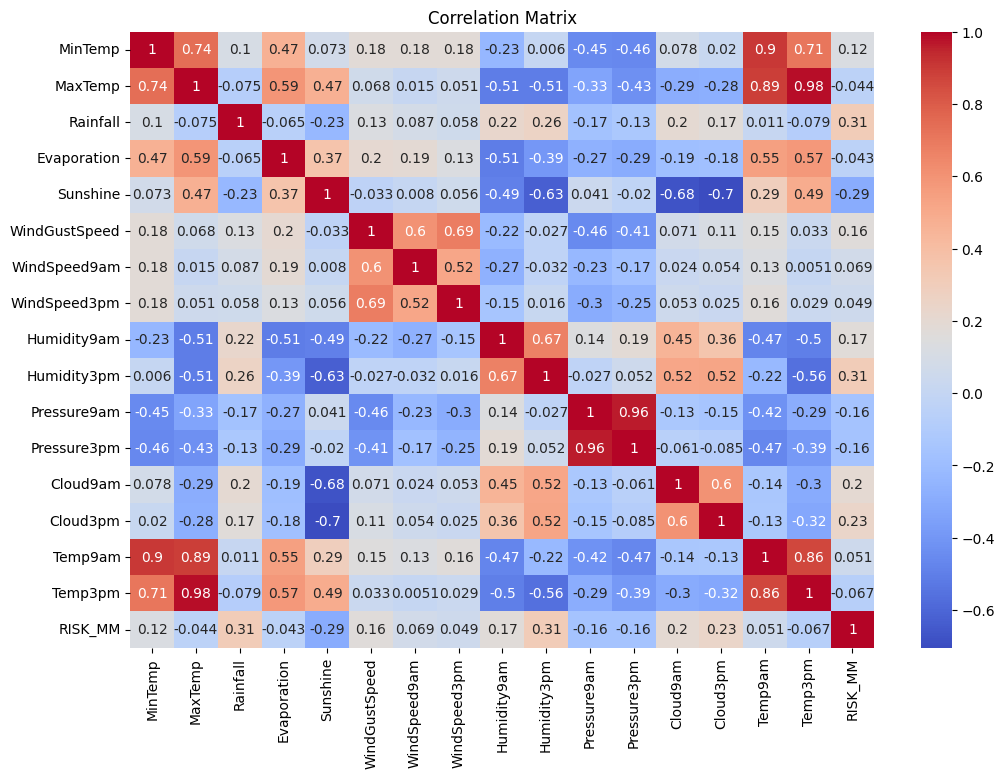

In [14]:
# Se seleccionan solo variable númericas para la correlación
numerical_df = df.select_dtypes(include=['number'])


plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Como se puede observar en el Heatmap las variables que tienen una gran correlacion son:

*   MinTemp con MaxTemp tienen una correlación de 0.74
*   MinTemp con Temp3am tienen una correlación de 0.71
*   MinTemp con Temp9am tienen una correlación de 0.9
*   MaxTemp con Temp3am tienen una correlación de 0.98
*   MaxTemp con Temp9am tienen una correlación de 0.89
*   Pressure9pm con Pressure3pm tienen una correlación de 0.96
*   Temp9am con Temp3am tienen una correlación de 0.86
*   Humidity3pm con Humidity9pm tienen una correlación de 0.67
*   Sunshine con Cloud9am tiene una correlación negativa de -0.68
*   Sunshine con Cloud3pm tiene una correlación negativa de -0.7
*   WindGustSpeed con WindSpeed3pm tiene una correlación de 0.69



In [15]:
# Separar "Date" en "Year"/"Month"/"Day"
df[["Year", "Month", "Day"]] = df["Date"].str.split("-", expand = True)
df["Year"] = df["Year"].astype("int")
df["Month"] = df["Month"].astype("int")
df["Day"] = df["Day"].astype("int")
df.drop("Date", axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


ANOVA
Análisis estadistico para saber si hay diferencias significativas entre la locación y las precipitaciones

In [16]:
groups = [df[df['Location'] == loc]['Rainfall'].dropna() for loc in df['Location'].unique()]
stat, p = f_oneway(*groups)
print(f"F-statistic: {stat}, p-value: {p}")

F-statistic: 53.01538523570973, p-value: 0.0


Hay diferencias significativas entre ambas variables ya que el p valor es menor a 0,05. Por lo que, las precipitaciones van a variar de acuerdo a la locación.

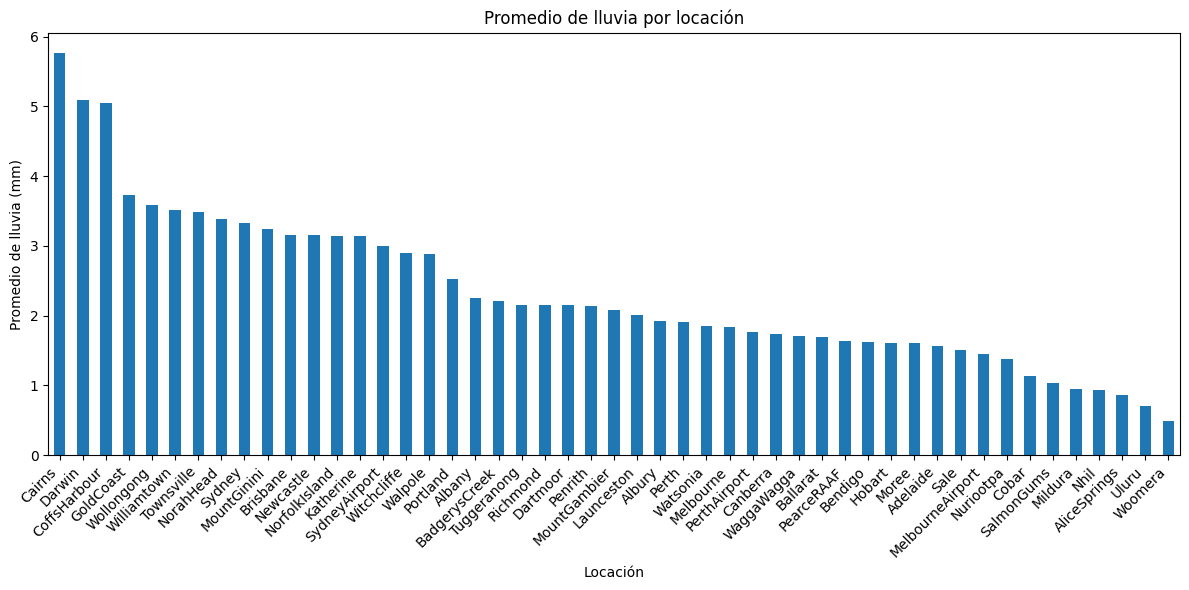

In [17]:
plt.figure(figsize=(12, 6))
df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Promedio de lluvia por locación')
plt.xlabel('Locación')
plt.ylabel('Promedio de lluvia (mm)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

De acuerdo las locaciones se puede observar que hay lugares de Australia donde el promedio de lluvias en mm es mayor respecto a otras locaciones donde el promedio no llega a 1 mm de promedio de lluvia en el periodo de tiempo estudiado.

In [18]:
# Se cambian las variables RainToday y RainTomorrow para que en vez de ser una variable categorica tipo objeto sea númerica.
for column in ['RainToday', 'RainTomorrow']:
  df[column] = df[column].map({'No': 0, 'Yes': 1})

df.value_counts(normalize=True)

Location          MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  Year  Month  Day
AliceSprings      -5.2     19.4     0.0       4.4          10.2      ENE          33.0           W           E           9.0           17.0          17.0         16.0         1022.5       1017.4       0.0       0.0       6.0      19.0     0.0        0.0      0             2012  7      7      0.000018
PerthAirport       20.3    33.7     0.0       10.2         5.2       E            57.0           NW          E           6.0           31.0          47.0         50.0         1014.2       1011.8       7.0       3.0       23.6     31.4     0.0        10.2     1             2015  2      1      0.000018
                   20.2    31.2     0.2       8.2          5.5       SSW          41.0           S           S           17.0          33.0          69.0         50.0         1012.0       1008.8       7.0       7.0       24.9     29.0     0.0        0.0      0             2011  1      23     0.000018
                           34.2     0.0       9.4          10.4      ENE          59.0           ENE         E           31.0          19.0          42.0         30.0         1009.8       1007.2       2.0       4.0       25.4     32.7     0.0        0.0      0             2013  1      12     0.000018
                           37.2     0.0       10.2         11.9      E            54.0           ENE         S           24.0          9.0           28.0         26.0         1013.1       1010.4       2.0       3.0       29.0     36.3     0.0        0.0      0             2009  12     19     0.000018
                                                                                                                                                                                                                                                                                                       ...   
MelbourneAirport   8.8     29.2     0.0       7.6          9.4       N            57.0           N           NNE         33.0          44.0          44.0         24.0         1020.3       1014.6       7.0       7.0       19.3     26.4     0.0        0.0      0             2012  11     20     0.000018
                   8.9     12.2     1.8       0.8          0.6       SW           30.0           WSW         SSE         17.0          15.0          97.0         95.0         1028.5       1027.0       7.0       8.0       9.4      10.6     1.0        2.4      1             2012  6      9      0.000018
                           12.4     7.0       1.4          0.0       SSE          48.0           S           SSW         26.0          22.0          97.0         89.0         1005.8       1004.0       8.0       8.0       11.8     11.8     1.0        5.2      1             2016  6      20     0.000018
                           12.7     1.2       4.6          7.9       SW           87.0           WSW         SW          35.0          31.0          73.0         45.0         1012.7       1018.6       2.0       3.0       9.8      12.3     1.0        0.8      0             2009  8      7      0.000018
Woomera            31.4    46.2     0.0       22.0         12.6      NNW          61.0           NW          N           30.0          22.0          18.0         7.0          1004.4       1003.0       1.0       1.0       37.9     45.3     0.0        0.0      0             2009  2      7      0.000018
Name: proportion, Length: 56420, dtype: float64

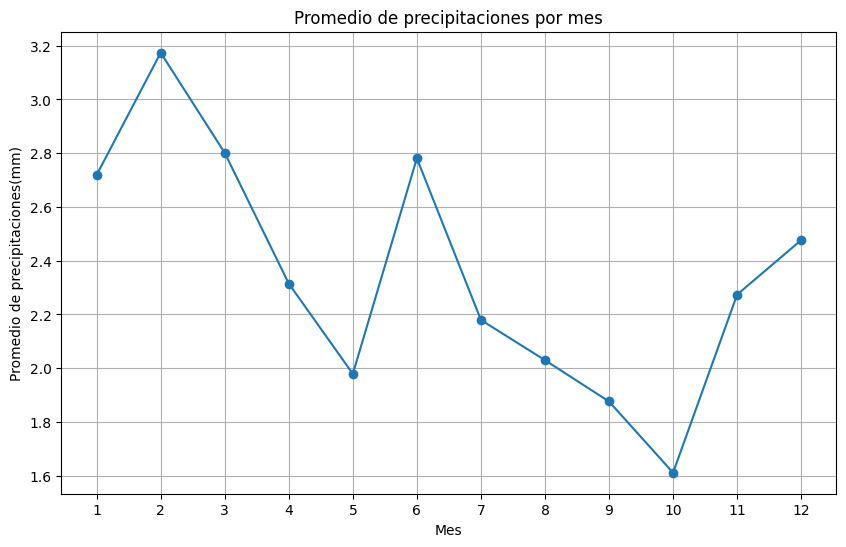

In [19]:

# Agrupar los datos de acuerdo al mes y se calcula el promedio de precipitaciones por mes
monthly_rainfall = df.groupby('Month')['Rainfall'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_rainfall.index, monthly_rainfall.values, marker='o')
plt.xlabel('Mes')
plt.ylabel('Promedio de precipitaciones(mm)')
plt.title('Promedio de precipitaciones por mes')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

Se observa que las lluvias son un fenómeno estacional siendo que para el primer trimestre del año existe un promedio mayor respecto al resto del año.

DATOS FALTANTES


Para los datos faltantes en el caso de variables numéricas se tendra en cuenta el promedio de la misma respecto a la locación que tiene cada estación metereológica ya que se observaron diferencias significativas entre las variables de precipitación y locación.



In [20]:
#  promedio de variables numericas de acuerdo a location

numerical_cols = df.select_dtypes(include=np.number).columns
location_means = df.groupby('Location')[numerical_cols].mean()

location_means

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
Location,,,,,,,,,,,,,,,,,,,,,
Adelaide,12.628368,22.945402,1.572185,5.824924,7.752002,36.530812,9.954295,15.470665,59.618476,44.820097,...,NaN,NaN,16.973193,21.603953,0.223841,1.565243,0.222654,2012.525890,6.523948,15.740453
Albany,12.948461,20.072587,2.255073,4.207273,6.658765,NaN,12.498986,19.001305,74.820202,67.392487,...,5.190876,4.808703,16.233154,18.412974,0.298064,2.263926,0.299072,2012.708554,6.413130,15.680371
Albury,9.520899,22.630963,1.925710,NaN,NaN,32.953016,8.221816,14.378828,74.108081,47.884935,...,6.392356,5.419788,14.348620,21.364716,0.205617,1.914381,0.205247,2012.733643,6.412488,15.745932
AliceSprings,13.125182,29.244191,0.869355,9.029929,9.581944,40.533714,14.728623,18.103665,39.625165,24.078321,...,2.839200,3.245791,21.328868,28.008452,0.079669,0.883141,0.080501,2012.719565,6.407456,15.689211
BadgerysCreek,11.136900,24.023111,2.207925,NaN,NaN,33.609890,8.047488,14.008262,76.893067,51.426648,...,NaN,NaN,16.574141,22.516644,0.198818,2.193101,0.199112,2012.790984,6.326161,15.769467
Ballarat,7.355302,18.274794,1.688830,NaN,NaN,44.978695,19.978477,22.780496,81.816428,59.045665,...,5.797101,6.286865,11.664125,16.776447,0.257872,1.739960,0.257926,2012.732166,6.422061,15.727543
Bendigo,8.591065,21.616683,1.621452,3.851730,NaN,38.849283,12.934675,17.157374,70.543084,46.472140,...,4.396618,4.857080,13.844789,20.249885,0.185479,1.619380,0.185234,2012.723138,6.415953,15.723467
Brisbane,16.410998,26.441527,3.160536,5.408848,8.082782,28.211380,6.950965,11.000633,64.014878,53.862627,...,3.918354,3.879076,21.829186,24.742354,0.224777,3.144891,0.224296,2012.496678,6.556786,15.719076
Cairns,21.199197,29.544344,5.765317,6.211976,7.575995,38.067991,15.926372,21.927017,69.902276,61.677376,...,4.557974,4.429907,25.799465,27.896653,0.317476,5.741901,0.317938,2012.677376,6.363454,15.720214


In [21]:
# Utilizar el promedio calculado por locación para rellenar datos faltantes de variables numericas

for location in df['Location'].unique():

    location_data = df[df['Location'] == location]
    numerical_cols = location_data.select_dtypes(include=np.number).columns


    for col in numerical_cols:
        mean_value = location_means.loc[location, col]
        df.loc[(df['Location'] == location) & (df[col].isnull()), col] = mean_value
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.000000,5.419788,16.9,21.8,0.0,0.0,0.0,2008.0,12.0,1.0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,6.392356,5.419788,17.2,24.3,0.0,0.0,0.0,2008.0,12.0,2.0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,6.392356,2.000000,21.0,23.2,0.0,0.0,0.0,2008.0,12.0,3.0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,6.392356,5.419788,18.1,26.5,0.0,1.0,0.0,2008.0,12.0,4.0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.000000,8.000000,17.8,29.7,0.0,0.2,0.0,2008.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,5.588757,4.825980,9.4,20.9,0.0,0.0,0.0,2017.0,6.0,20.0
142189,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,5.588757,4.825980,10.1,22.4,0.0,0.0,0.0,2017.0,6.0,21.0
142190,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,5.588757,4.825980,10.9,24.5,0.0,0.0,0.0,2017.0,6.0,22.0
142191,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,5.588757,4.825980,12.5,26.1,0.0,0.0,0.0,2017.0,6.0,23.0


In [22]:
# Llenar con la moda los datos faltantes de las variables tipo categoricas

for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
#Calcular datos faltantes

print(df.isnull().sum())

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      44261
Sunshine         52071
WindGustDir          0
WindGustSpeed     5971
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      11781
Pressure3pm      11781
Cloud9am         34034
Cloud3pm         34034
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64


Se puede observar que aún quedan datos faltantes de variables como Evaporation, Sunshine, Windgustdir, Pressure9am, Pressure3pm, Cloud9am y Cloud3pm, por lo que para abordar esta situación será mejor rellenar con la media de cada variable independientemente de la locación.


In [24]:
# Rellenar datos faltantes con la media

for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].mean())

# Recalcular datos faltantes
print(df.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64


Conclusión Parte I:
Se realizó un EDA y Data Wrangling con el dataset elegido. Aun no se ha tenido en cuenta eliminar los outliers ya que si no se deben a un error, eliminarlos o sustituirlos puede modificar las inferencias que se realicen a partir de esa información, debido a que introducen un sesgo, a que disminuyen el tamaño muestral y a que pueden afectar tanto a la distribución como a las varianzas. En caso de ser necesario, se relizará en la segunda parte del trabajo.

**Parte II:**


*   Reducción de la dimensionalidad
*   Detección de outliers
*   Algoritmos de clasificación
*   Métricas



**Reducción de la dimensionalidad de variables categoricas**

In [25]:
pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.3/417.3 kB 5.5 MB/s eta 0:00:00


In [26]:
from prince import MCA

In [27]:
# prompt: separacion de variables categoricas y numericas

# Define numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Create separate DataFrames for numerical and categorical features
df_num = df[numerical_features]
df_datacat = df[categorical_features]

print("Numerical features:")
print(df_num.head())

print("\nCategorical features:")
print(df_datacat.head())


Numerical features:
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6     5.438595  7.648352           44.0   
1      7.4     25.1       0.0     5.438595  7.648352           44.0   
2     12.9     25.7       0.0     5.438595  7.648352           46.0   
3      9.2     28.0       0.0     5.438595  7.648352           24.0   
4     17.5     32.3       1.0     5.438595  7.648352           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Cloud9am  \
0          20.0          24.0         71.0         22.0  ...  8.000000   
1           4.0          22.0         44.0         25.0  ...  6.392356   
2          19.0          26.0         38.0         30.0  ...  6.392356   
3          11.0           9.0         45.0         16.0  ...  6.392356   
4           7.0          20.0         82.0         33.0  ...  7.000000   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow    Year  \
0  5.419788     16.9     21.8    

In [28]:
 df_datacat_OHE=pd.get_dummies(df_datacat)
 df_datacat_OHE

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
142189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
142190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
142191,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [29]:
mca = MCA(n_components=2)
mca.fit(df_datacat_OHE)
mca_results = mca.transform(df_datacat_OHE)
mca_results

,0,1
0,0.165547,-0.092223
1,0.198873,-0.043118
2,0.104692,-0.186439
3,-0.144796,0.171021
4,0.119314,0.060591
...,...,...
142188,-0.264763,0.254131
142189,-0.261064,0.250604
142190,0.015963,0.192025
142191,0.011132,0.131785


In [30]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.025,2.51%,2.51%
1,0.023,2.33%,4.84%


In [31]:
mca.column_coordinates(df_datacat_OHE).style.format('{:.0%}')


,0,1
Location_Adelaide__False,-1%,1%
Location_Adelaide__True,48%,-42%
Location_Albany__False,-1%,1%
Location_Albany__True,44%,-67%
Location_Albury__False,-0%,-0%
Location_Albury__True,12%,10%
Location_AliceSprings__False,2%,-1%
Location_AliceSprings__True,-92%,59%
Location_BadgerysCreek__False,0%,-0%
Location_BadgerysCreek__True,-12%,0%


Con esta tabla se muestra cual es el porcentaje de contribución de cada variable para las componentes 0 y 1 respectivamente. Luego de realizar la reducción de dimensionalidad de las variables categóricas es necesario concatenar ambos dataframe, el nuevo con las componentes 0 y 1 y el dataframe de variables numéricas



In [32]:
df_concat = pd.concat([df_num, mca_results], axis=1)
df_concat =  df_concat.rename(columns={0: 'componente1', 1:"componente2"})
df_concat

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,componente1,componente2
0,13.4,22.9,0.6,5.438595,7.648352,44.0,20.0,24.0,71.0,22.0,...,16.9,21.8,0.0,0.0,0.0,2008.0,12.0,1.0,0.165547,-0.092223
1,7.4,25.1,0.0,5.438595,7.648352,44.0,4.0,22.0,44.0,25.0,...,17.2,24.3,0.0,0.0,0.0,2008.0,12.0,2.0,0.198873,-0.043118
2,12.9,25.7,0.0,5.438595,7.648352,46.0,19.0,26.0,38.0,30.0,...,21.0,23.2,0.0,0.0,0.0,2008.0,12.0,3.0,0.104692,-0.186439
3,9.2,28.0,0.0,5.438595,7.648352,24.0,11.0,9.0,45.0,16.0,...,18.1,26.5,0.0,1.0,0.0,2008.0,12.0,4.0,-0.144796,0.171021
4,17.5,32.3,1.0,5.438595,7.648352,41.0,7.0,20.0,82.0,33.0,...,17.8,29.7,0.0,0.2,0.0,2008.0,12.0,5.0,0.119314,0.060591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,5.438595,7.648352,31.0,15.0,13.0,59.0,27.0,...,9.4,20.9,0.0,0.0,0.0,2017.0,6.0,20.0,-0.264763,0.254131
142189,2.8,23.4,0.0,5.438595,7.648352,31.0,13.0,11.0,51.0,24.0,...,10.1,22.4,0.0,0.0,0.0,2017.0,6.0,21.0,-0.261064,0.250604
142190,3.6,25.3,0.0,5.438595,7.648352,22.0,13.0,9.0,56.0,21.0,...,10.9,24.5,0.0,0.0,0.0,2017.0,6.0,22.0,0.015963,0.192025
142191,5.4,26.9,0.0,5.438595,7.648352,37.0,9.0,9.0,53.0,24.0,...,12.5,26.1,0.0,0.0,0.0,2017.0,6.0,23.0,0.011132,0.131785


**Eliminación de outliers**

In [33]:
# Eliminación de outliers utilizando Isolation Forest

# Crear un Dataframe de variables numéricas sin outliers
df_concat_no_outliers = df_concat.copy()

# Crear una instancia del modelo Isolation Forest
isolation_forest = IsolationForest(n_estimators=500, contamination=0.15)

# Entrenar el modelo con los datos seleccionados
isolation_forest.fit(df_concat_no_outliers)

# Predicción de  anomalias
predictions = isolation_forest.predict(df_concat_no_outliers)

# Identificación de outliers
df_concat_no_outliers['anomaly'] = predictions
outliers = df_concat_no_outliers.loc[df_concat_no_outliers['anomaly'] == -1]

# Eliminación de outliers
df_concat_no_outliers = df_concat_no_outliers[df_concat_no_outliers['anomaly'] == 1]

# Eliminar la columna 'anomaly'
df_concat_no_outliers = df_concat_no_outliers.drop('anomaly', axis=1)

# df_datanum_no_outliers es el dataframe de variables numéricas sin outliers
print(df_concat_no_outliers.head())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6     5.438595  7.648352           44.0   
1      7.4     25.1       0.0     5.438595  7.648352           44.0   
2     12.9     25.7       0.0     5.438595  7.648352           46.0   
3      9.2     28.0       0.0     5.438595  7.648352           24.0   
4     17.5     32.3       1.0     5.438595  7.648352           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Temp9am  \
0          20.0          24.0         71.0         22.0  ...     16.9   
1           4.0          22.0         44.0         25.0  ...     17.2   
2          19.0          26.0         38.0         30.0  ...     21.0   
3          11.0           9.0         45.0         16.0  ...     18.1   
4           7.0          20.0         82.0         33.0  ...     17.8   

   Temp3pm  RainToday  RISK_MM  RainTomorrow    Year  Month  Day  componente1  \
0     21.8        0.0      0.0           0.0  2008.0 

In [34]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        142193 non-null  float64
 1   MaxTemp        142193 non-null  float64
 2   Rainfall       142193 non-null  float64
 3   Evaporation    142193 non-null  float64
 4   Sunshine       142193 non-null  float64
 5   WindGustSpeed  142193 non-null  float64
 6   WindSpeed9am   142193 non-null  float64
 7   WindSpeed3pm   142193 non-null  float64
 8   Humidity9am    142193 non-null  float64
 9   Humidity3pm    142193 non-null  float64
 10  Pressure9am    142193 non-null  float64
 11  Pressure3pm    142193 non-null  float64
 12  Cloud9am       142193 non-null  float64
 13  Cloud3pm       142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  float64
 17  RISK_MM        142193 non-nul

Separar datos entre variables dependiente e independiente


In [35]:
X = df_concat.drop(['RainTomorrow'],axis=1)
y = df_concat['RainTomorrow']

# Regresión logistica

In [36]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [38]:

# Aplicar SMOTE para balancear las clases
smote = SMOTE(k_neighbors=5,random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

values_counts_SMOTE = np.asarray(np.unique(y_train_smote, return_counts=True))
values_counts_SMOTE


array([[0.0000e+00, 1.0000e+00],
       [9.9284e+04, 9.9284e+04]])

In [39]:
# Entrenar un clasificador en los datos con SMOTE
classifier = LogisticRegression(class_weight="balanced")
modelo_datos_SMOTE = classifier.fit(X_train_smote, y_train_smote)

# Realizar predicciones en el conjunto de prueba
y_pred_SMOTE = modelo_datos_SMOTE.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred_SMOTE))



              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     11032
         1.0       0.95      0.97      0.96      3188

    accuracy                           0.98     14220
   macro avg       0.97      0.98      0.97     14220
weighted avg       0.98      0.98      0.98     14220



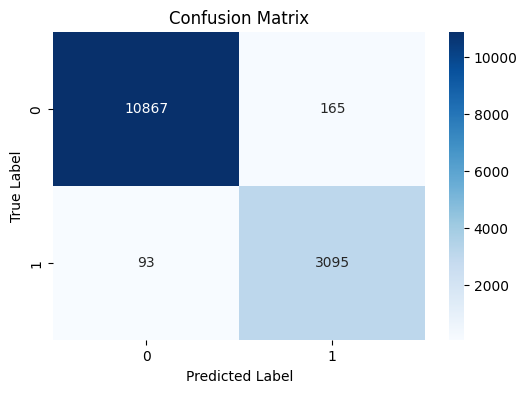

In [40]:
# Creando la matriz de confusión
cm = confusion_matrix(y_test, y_pred_SMOTE)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

El modelo es muy efectivo en general ya que tiene un excelente desempeño en clasificar a la clase mayoritaria (clase 0) y buen desempeño en la clase minoritaria (clase 1). Se puede observar que el modelo comete algunos errores al predecir clase 1 (falsos positivos), tiene una alta tasa de detección de los valores verdaderos positivos (alto recall). En resumen, es un modelo robusto y equilibrado, pero puede mejorarse un poco en la precisión de la clase 1 si es necesario.

Curva ROC y AUC

In [41]:
lr_probs = modelo_datos_SMOTE.predict_proba(X_train)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]

In [42]:
#GeneraR un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_train))]

In [43]:

# Calcular el AUC
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# Calcular las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)

In [44]:
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.999


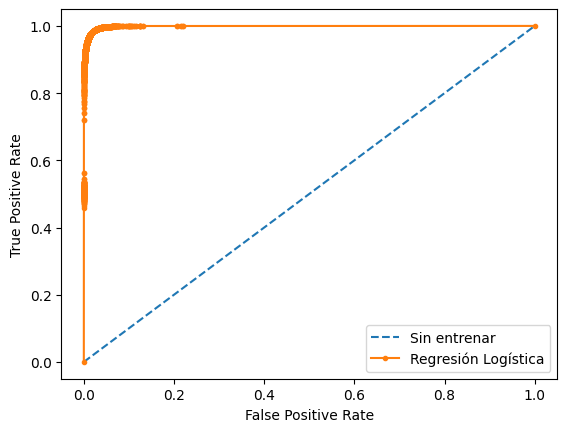

In [45]:
# curvas ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Que el ROC-AUC sin entrenar de un valor de 0.5 nos indica que el modelo no tiene la capacidad de distinguir en la clasificación. Mientras que cuando se entrena al modelo con Regresión logística, estos valores se convierten en 0.99, si bien son valores altos en el que indica que el modelo puede clasificar de manera correcta los valores de predicción puede que haya un problema de overfitting en donde el modelo aprendió demasiado de los valores de entrenamiento.

Hyperparameter tuning

In [51]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'C': uniform(0.001, 10),  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], # Regularization type
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], # Algorithm to use in optimization
    'max_iter': randint(100, 500), # Maximum number of iterations
}

# Create a LogisticRegression model
classifier = LogisticRegression(class_weight="balanced")

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    classifier,
    param_distributions=param_grid,
    n_iter=15,  # Number of random combinations to try
    cv=3,  # Number of cross-validation folds
    scoring='accuracy', # Evaluation metric
    n_jobs=-1, # Use all available cores
    random_state=42,
    verbose=1 # Output detailed information
)


# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Use the best model to make predictions on the test set
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the performance of the best model
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best hyperparameters: {'C': 9.657320330745593, 'max_iter': 341, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score: 0.9999697839552802
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11032
         1.0       1.00      1.00      1.00      3188

    accuracy                           1.00     14220
   macro avg       1.00      1.00      1.00     14220
weighted avg       1.00      1.00      1.00     14220



# Random Forest
